<a href="https://colab.research.google.com/github/Subhash11520/PRODIGY_GA_05/blob/main/neural_style_transfer_drive_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎨 Neural Style Transfer with Google Drive
This notebook loads content and style images from your Google Drive and applies neural style transfer using TensorFlow Hub.

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import os


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
def load_img(path_to_img, max_dim=512):
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)
    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = np.array(tensor, dtype=np.uint8)
    if tensor.ndim > 3:
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)


In [4]:
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

def run_style_transfer(content_path, style_path, max_dim=512):
    content_image = load_img(content_path, max_dim)
    style_image = load_img(style_path, max_dim)
    stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
    return content_image, style_image, stylized_image


In [5]:
def show_images(content, style, stylized):
    content_img = tensor_to_image(content)
    style_img = tensor_to_image(style)
    stylized_img = tensor_to_image(stylized)

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for ax, img, title in zip(axes, [content_img, style_img, stylized_img],
                              ["Content Image", "Style Image", "Stylized Image"]):
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


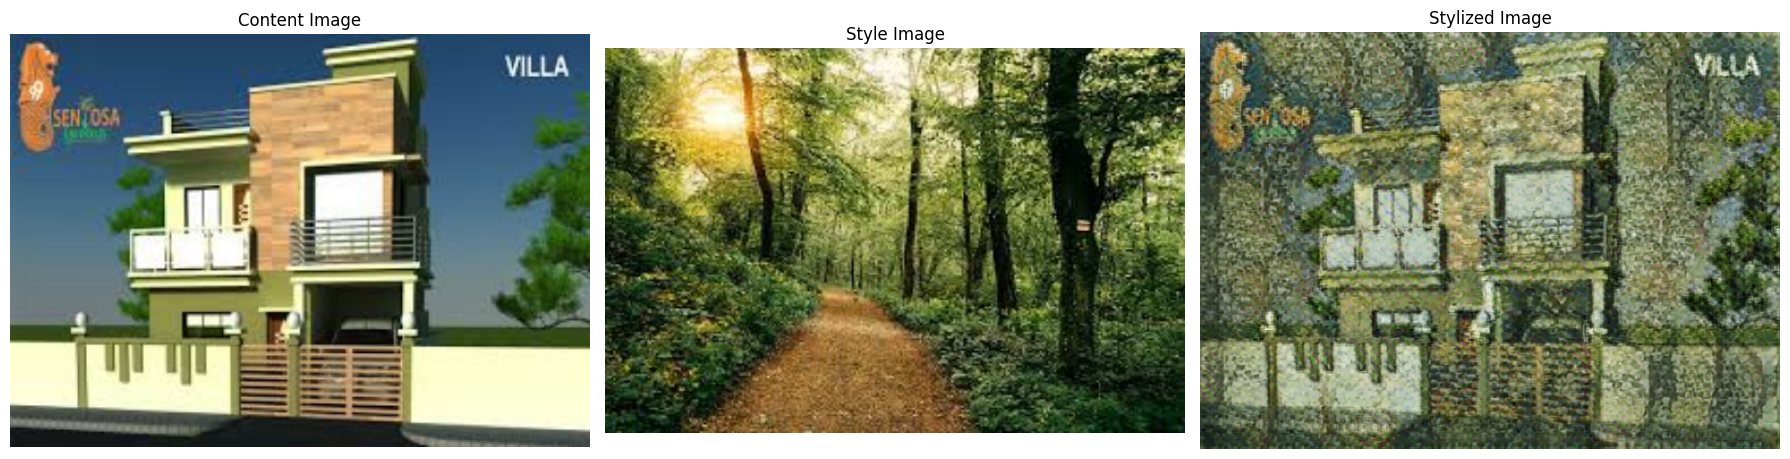

✅ Stylized image saved to: /content/drive/MyDrive/stylized_output.png


In [7]:
# Replace with your actual Google Drive image paths
content_path = '/content/drive/MyDrive/images_content.jpeg'
style_path = '/content/drive/MyDrive/images_style.jpeg'
max_resolution = 512

if not os.path.exists(content_path) or not os.path.exists(style_path):
    print("❌ Error: One or both image paths do not exist.")
else:
    content, style, stylized = run_style_transfer(content_path, style_path, max_resolution)
    show_images(content, style, stylized)

    save_path = '/content/drive/MyDrive/stylized_output.png'
    tensor_to_image(stylized).save(save_path)
    print(f"✅ Stylized image saved to: {save_path}")
